# WeatherPy

### Analysis
Analysis 1 - Temperatures appear to be highest between 0 and 20 degrees latitude.
Analysis 2 - Not much humidity latitudes less than -20 degrees latitude.
Analysis 3 - No correlation with cloud cover and location.
Analysis 4 - For most part, wind speed is less than 20 miles per hour in all latitudes.

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

587

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [6]:
# Starting URL for Weather Map API Call
#manual enter api - Cannot get import function to work for whatever reason...
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + "d34567d798a56a6efd20c2de1db7aadf" + "&q="

In [7]:
# List of the data I need from json file
name = []
cloudiness = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind = []

count = 1
_set = 1


# Loop through the cities pulled from citipy retrieve requested data
for city in cities:
    try:
        response = requests.get(url + city).json()
        cloudiness.append(response['clouds']['all'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind.append(response['wind']['speed'])
        name.append(response['name'])
        
        print(f"{count}. {city}")
                
        count += 1

    except KeyError:
        print("City not found...skipping")
        
        _set += 1

1. kirensk
2. quatre cocos
3. nanuque
4. tuatapere
5. arkadak
6. albany
7. geraldton
8. guerrero negro
9. saint stephen
10. atuona
City not found...skipping
11. belmonte
12. cidreira
13. ponta do sol
14. avarua
City not found...skipping
15. punta arenas
16. pochutla
17. kapaa
18. butaritari
19. hobart
20. tsumeb
21. cape town
22. ushuaia
23. khatanga
24. challakere
25. candolim
26. alto araguaia
27. kaitangata
28. miri
29. jamestown
City not found...skipping
30. pangnirtung
31. port hedland
32. antofagasta
33. gorontalo
34. provideniya
35. coihaique
36. ancud
37. lorengau
38. east london
39. hithadhoo
40. mataura
41. porto walter
City not found...skipping
42. zhigansk
43. new norfolk
44. songjianghe
45. bud
46. vaini
47. caravelas
48. slonim
49. manzanillo
50. khandyga
51. qaanaaq
52. saint-philippe
53. georgetown
54. bredasdorp
55. arraial do cabo
56. kavaratti
57. mar del plata
58. mandal
59. dillon
60. asosa
61. ilulissat
62. rikitea
63. hasaki
64. acapulco
65. dikson
66. puerto ayo

489. kalemie
490. shuya
491. jinchang
492. vila
493. coahuayana
494. douglas
495. callaguip
496. izhma
497. bara
498. elbrus
499. zavetnoye
500. lahaina
501. aksha
502. nabire
503. yokadouma
504. fort wellington
505. ouallam
506. srednekolymsk
507. mutuipe
508. panalingaan
509. tomatlan
510. henties bay
511. chimbote
512. qasigiannguit
513. yima
514. goianira
515. baruun-urt
City not found...skipping
516. xinmin
517. kaseda
518. waipawa
519. bolgar
City not found...skipping
520. gravdal
521. saint-augustin
522. ginda
523. ambovombe
524. beruwala
525. ixtapa
526. ambilobe
527. sao joao da barra
528. kedougou
529. pandan
530. moussoro
531. nuuk
532. biltine
City not found...skipping
533. los llanos de aridane
534. takoradi


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
# Create Data Frame

weather_dict = {
    "City": name,
    "Cloudiness": cloudiness,
    "Date": date,
    "Humidity": humidity,
    "Latitude": lat,
    "Longitude": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind
}

city_weather_data = pd.DataFrame(weather_dict)

city_weather_data.count()

City          534
Cloudiness    534
Date          534
Humidity      534
Latitude      534
Longitude     534
Max Temp      534
Wind Speed    534
dtype: int64

In [22]:
# Display the city data frame
city_weather_data.head()

,City,Cloudiness,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Kirensk,0,1537603409,50,57.78,108.12,52.83,3.38
1,Quatre Cocos,40,1537599600,61,-20.21,57.76,78.80,14.99
2,Nanuque,8,1537603340,94,-17.84,-40.35,69.03,8.08
3,Tuatapere,12,1537603409,86,-46.13,167.69,52.29,13.67
4,Arkadak,12,1537603409,56,51.94,43.49,74.25,5.95


In [23]:
# Save the Data Frame as csv
city_weather_data.to_csv("cities.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

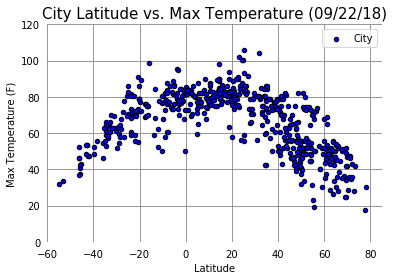

In [12]:
# Scatter Plat #1 Temperature (F) vs. Latitude  

ax = weather_data.plot(kind="scatter", x="Latitude", y="Max Temp", color="blue", edgecolors="black", label="City")

ax.set_ylim((0, 120))
ax.set_xlim((-60, 85))
ax.set_xlabel("Latitude", fontsize=10)
ax.set_ylabel("Max Temperature (F)",fontsize=10)
ax.set_title("City Latitude vs. Max Temperature (09/22/18)",fontsize=15)
ax.set_facecolor("white")
ax.grid(color="grey")
ax.set_axisbelow(True)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend()



plt.tick_params(bottom=False, left=False)
plt.savefig("Lat_vs_MaxTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

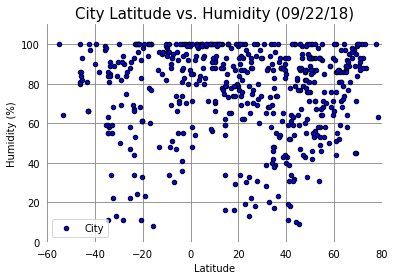

In [18]:
# Scatter plot #2 Humidity vs Latitude
ax = weather_data.plot(kind="scatter", x="Latitude", y="Humidity", color="blue", edgecolor="black", label="City")

ax.set_ylim((0, 110))
ax.set_xlim((-60, 80))
ax.set_xlabel("Latitude", fontsize=10)
ax.set_ylabel("Humidity (%)",fontsize=10)
ax.set_title("City Latitude vs. Humidity (09/22/18)",fontsize=15)
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity (%)")
ax.set_facecolor("white")
ax.grid(color="grey")
ax.set_axisbelow(True)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend()

plt.tick_params(bottom=False, left=False)
plt.savefig("Lat_vs_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

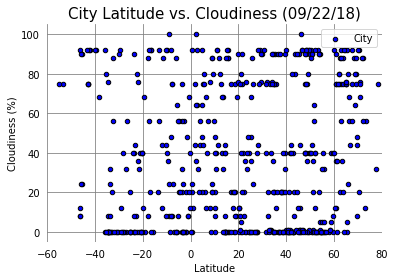

In [17]:
# Scatter Plot #3 Cloudiness (%) vs Latitude
ax = weather_data.plot(kind="scatter", x="Latitude", y="Cloudiness", color="blue", edgecolor="black", label="City")

ax.set_ylim((-5, 105))
ax.set_xlim((-60, 80))
ax.set_xlabel("Latitude", Fontsize=10)
ax.set_ylabel("Cloudiness (%)", Fontsize=10)
ax.set_title("City Latitude vs. Cloudiness (09/22/18)", Fontsize=15)
ax.set_facecolor("white")
ax.grid(color="grey")
ax.set_axisbelow(True)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend()

plt.tick_params(bottom=False, left=False)
plt.savefig("Lat_vs_Clouds.png")
plt.show()

#### Latitude vs. Wind Speed Plot

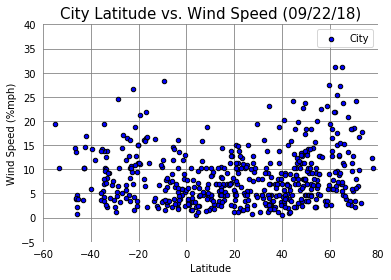

In [20]:

# Plot City Latitude vs Wind Speed# Plot C 
ax = weather_data.plot(kind="scatter", x="Latitude", y="Wind Speed", color="blue", edgecolor="black", label="City")

ax.set_ylim((-5, 40))
ax.set_xlim((-60, 80))
ax.set_xlabel("Latitude", Fontsize=10)
ax.set_ylabel("Wind Speed (%mph)", Fontsize=10)
ax.set_title("City Latitude vs. Wind Speed (09/22/18)", Fontsize=15)
ax.set_facecolor("white")
ax.grid(color="grey")
ax.set_axisbelow(True)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend()
        
plt.tick_params(bottom=False, left=False)
plt.savefig("Lat_vs_Wind.png")
plt.show()